<a href="https://colab.research.google.com/github/nimaafshari/TF_Training_Sessions/blob/main/TF_Trianing_Session_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Session 2: Binary and Multi-class Classification**

This notebook walks through the implementation of binary and multi-class classification in Tensorflow (TF).

Apart from the different network structures which the problem might have, the key difference between binary and multiclass classification is the final layer activation function. In binary classification we usually use a sigmoid activation function and for multiclass we typically use softmax. 

In this example we will train a multiclass classification problem using TF for greyscale images of handwritten 0-9 digits. 

**Agenda**

1. Binary Classification for detecting 0 and 9 handwritten digits

2. Multiclass classification for detecting 0 to 9 handwritten digits




First we should import the packages which we need.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown


The MNIST database of handwritten digits, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. 

The digits have already been size-normalized and centered in a fixed-size image. For the binary classification task we will filter the images to only those for 0 and 9 and we will then assign the labels False and True to them. 

For the multiclass section we will create a classification for all numbers (0-9) individually.


**1. Binary Classification**

Here we prepare a function to filter the original data to have only 0 and 9 in our dataset and will try to predict only these 2 classes

In [2]:
def filter_09(x, y):
    keep = (y == 0) | (y == 9)
    x, y = x[keep], y[keep]
    y = (y == 9)
    return x,y

The MNIST dataset is available in the tensorflow keras package. First, we will load the dataset and then filter it to only the images of 0 and 9.  We can then check the size of the resulting training and test datasets



In [3]:
(training_images, training_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

training_images, training_labels = filter_09(training_images, training_labels)
test_images, test_labels = filter_09(test_images, test_labels)

print("Number of filtered training examples:", len(training_images))
print("Number of filtered test examples:", len(test_images))

11493376/11490434 [==============================] - 0s 0us/step
Number of filtered training examples: 11872
Number of filtered test examples: 1989


Looking at some of the individual images:

#<strong>Label:  False</strong><br/><br/>

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  46 105 254 254 254 254 255 239  41   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  37 118 222 254 253 253 253 253 253 253 211  54   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  14 200 253 253 254 253 253 253 253 253 253 253 116   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  16 160 236 253 253 253 254 253 253 246 229 25

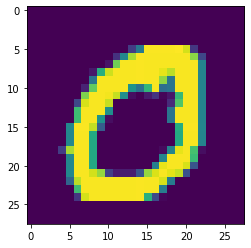

In [4]:
index = 11

np.set_printoptions(linewidth=200)
plt.imshow(training_images[index,:,:])
display(Markdown(f'#<strong>Label:  {training_labels[index]}</strong><br/><br/>'))
print(training_images[index,:,:],'\n\n')


It is a good practice to normalise the data whenever we use optimization algorithms. This will let the algorithm work more efficiently and converge faster. An easy method of normalization is just dividing by the maximum of the dataset. 


In [5]:
# Rescale the images from [0,255] to the [0.0,1.0] range.
training_images, test_images = training_images[..., np.newaxis]/255.0, test_images[..., np.newaxis]/255.0

Next we create, compile and train model in the TF. 

Note that these steps are completely specific to the problem we are trying to solve. For example here we want to use a Dense Layer in the model. As the input is in 2 dimensions (28*28) we should first convert that to 1-D using a flatten layer. 

Also for the last layer of the binary classification model we will use 1 neuron, with a sigmoid activation function. 

Although choosing (or tuning) the specific optimizers and loss functions is out of the scope of this training session, we will consider a trial and error approach to get the best for the problem we have.

In [6]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation='relu'), 
                                    tf.keras.layers.Dense(1, activation='sigmoid')])

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5, validation_data = (test_images, test_labels))

Epoch 1/5
371/371 [==============================] - 2s 4ms/step - loss: 0.0739 - accuracy: 0.9788 - val_loss: 0.0182 - val_accuracy: 0.9950
Epoch 2/5
371/371 [==============================] - 1s 2ms/step - loss: 0.0114 - accuracy: 0.9964 - val_loss: 0.0176 - val_accuracy: 0.9955
Epoch 3/5
371/371 [==============================] - 1s 2ms/step - loss: 0.0104 - accuracy: 0.9963 - val_loss: 0.0195 - val_accuracy: 0.9935
Epoch 4/5
371/371 [==============================] - 1s 2ms/step - loss: 0.0090 - accuracy: 0.9973 - val_loss: 0.0180 - val_accuracy: 0.9960
Epoch 5/5
371/371 [==============================] - 1s 2ms/step - loss: 0.0091 - accuracy: 0.9968 - val_loss: 0.0128 - val_accuracy: 0.9975


Now let's test some predictions!

In [8]:
classifications = model.predict(test_images)

index = 16
print(classifications[index])
display(Markdown(f'#<strong>Predicted Label:  {np.round(classifications[index])}</strong><br/>'))
display(Markdown(f'#<strong>Actual Label:  {test_labels[index]}</strong><br/>'))

[0.999995]


#<strong>Predicted Label:  [1.]</strong><br/>

#<strong>Actual Label:  True</strong><br/>

Confusion matrix

In [9]:
tf.math.confusion_matrix(test_labels, classifications)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[980,   0],
       [629, 380]], dtype=int32)>

**2. Multi-class Classification:**


Loading the same dataset but this time without filtering, so it has all the 0-9 numbers in it.

In [10]:
(training_images, training_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()


Let's take a look at what we get - first looking at the dataset shapes

In [ ]:
print(f'''
Shape of train data:  {training_images.shape}

Shape of train_label data:  {training_labels.shape}

Shape of test data:  {test_images.shape}

Shape of test_label data:  {test_labels.shape}
''')


Shape of train data:  (60000, 28, 28)

Shape of train_label data:  (60000,)

Shape of test data:  (10000, 28, 28)

Shape of test_label data:  (10000,)



Now looking at some examples

#<strong>Label:  3</strong><br/><br/>

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238  70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254 141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 254 254 254  34   

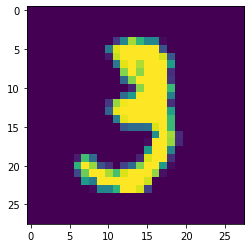

In [ ]:
index = 10

np.set_printoptions(linewidth=200)
plt.imshow(training_images[index,:,:])
display(Markdown(f'#<strong>Label:  {training_labels[index]}</strong><br/><br/>'))
print(training_images[index,:,:],'\n\n')


The first step in ML projects is to split the train/test portions. Fortunately, the MNIST dataset is already splitted for us (this helps researchers  to benchmark and compare models). 

The next step is to normalize the data. This step is not tied to only ML, it is an statistical necessity whenever use optimization methods to make all input data comparable to eachother (Various techniques can produce different results).

In [ ]:
# Rescale the images from [0,255] to the [0.0,1.0] range.
training_images, test_images = training_images[..., np.newaxis]/255.0, test_images[..., np.newaxis]/255.0

Now let's create our neural network. 

Here our input is 2-dimensional. Convolutionals can handle multiple dimensions directly and usually we use them for multi-dimesional projects.  However, for this training session we will convert that to 1-dimension using the flatten layer and then create the remaining part of the neural network for a (28*28 = 784) vector

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation='relu'), 
                                    tf.keras.layers.Dense(10, activation='softmax')])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4241 - accuracy: 0.8804
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1229 - accuracy: 0.9650
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0824 - accuracy: 0.9762
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0615 - accuracy: 0.9810
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0448 - accuracy: 0.9867


Evaluate the model using the test set

In [ ]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.0671 - accuracy: 0.9790


[0.06712546199560165, 0.9789999723434448]

Looking at some of the predictions

In [ ]:

classifications = model.predict(test_images)

index = 4
print(classifications[index])
display(Markdown(f'#<strong>Predicted Label:  {np.argmax(classifications[index])}</strong><br/>'))
display(Markdown(f'#<strong>Actual Label:  {test_labels[index]}</strong><br/>'))

[1.8707333e-07 8.8003658e-09 4.2051499e-07 9.3063752e-09 9.9806291e-01 4.6708712e-09 1.2393573e-07 1.1552711e-05 3.6809831e-07 1.9243339e-03]


#<strong>Predicted Label:  4</strong><br/>

#<strong>Actual Label:  4</strong><br/>